## Lack of Robustness of the Markowitz Procedure, and the GMV

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import risk_kit as kit

In [2]:
ind = kit.get_ind_returns()
er = kit.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [4]:
l = ["Food", "Steel"]
kit.max_Sharpe_ratio(0.1, er[l], cov.loc[l,l])

array([0.75040362, 0.24959638])

In [5]:
er[l] # This is insample exercise. Otherwise, there wont be a way to know expected returns exactly.

Food     0.116799
Steel    0.115809
dtype: float64

In [6]:
# Assume that we made a reasonable guess for expected return 11% for food and 12% for steel {not changing cov matrix for now}
kit.max_Sharpe_ratio(0.1, np.array([.11,.12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

Even a small change in expected returns ends up causing a pretty dramatic change in weights.

In [7]:
# Now make a guess of 10% and 13%
kit.max_Sharpe_ratio(0.1, np.array([.10,.13]), cov.loc[l,l]) # gave 100% in steel

array([0., 1.])

In [8]:
kit.max_Sharpe_ratio(0.1, np.array([.13,.10]), cov.loc[l,l])

array([1., 0.])

### The fact that if you are off by even a little bit in your expected returns, the resulting weights of the portfolio are dramatically altered. This is error maximizing nature of Markowitz. 
The estimation error is fairly minor, but there is massive shift in portfolio weights.

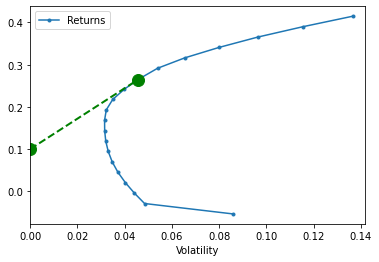

In [11]:
# Plot the portfolio
kit.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1)

To get to the big green dot, it is not easy as you need a really good estimate of the expected returns. On that efficient frontier, there is one portfolio where you don't need expected returns. The portfolio at the nose of Efficient frontier curve, has the minimum volatility. The portfolio with the minimum possible volatility is called GMV (Global Minimum Variance) portfolio.
There is one more way to avoid the expected returns. That is the equal weight portfolio or the Naive Diversification Portfolio.

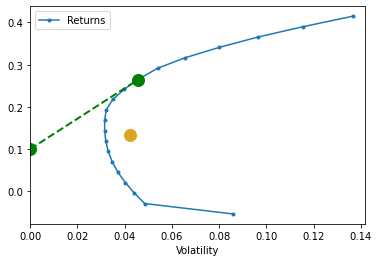

In [12]:
kit.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1, show_ew=True)

The equally weighted portfolio gave a position inside Eficient Frontier, but it took no work to get there. We'll try to identify the spot of GMV portfolio.

The optimizer can do GMV portfolio because it finds the max Sharpe Ratio. If all expected returns are the same, the max Sharpe Ratio is same as GMV portfolio because the optimizer cannot do anything with the return, the only way to improve the Sharpe ratio is by dropping volatility.

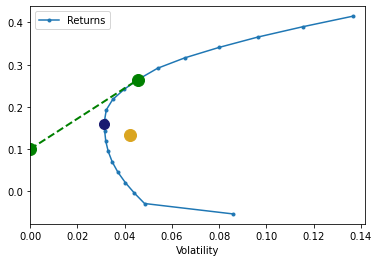

In [14]:
kit.plot_ef(20, er, cov, show_cml=True, risk_free_rate=0.1, show_ew=True, show_gmv=True)

Estimating covariance matrix is a lot easier than estimating the expected returns. 